In [1]:
print("om namo narayana")

om namo narayana


In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
df = pd.read_csv(r'D:\spider\machine_learning\testset.csv')

In [4]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()

In [7]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [8]:
print(df.head())
num_columns = []
data = df
data = data.fillna(data[:500].mean(axis = 0, skipna = True))
for i in range(len(data.columns)):
    print(i ,":", data.columns[i])

     datetime_utc  _conds   _dewptm   _fog   _hail   _heatindexm   _hum  \
0  19961101-11:00   Smoke       9.0      0       0           NaN   27.0   
1  19961101-12:00   Smoke      10.0      0       0           NaN   32.0   
2  19961101-13:00   Smoke      11.0      0       0           NaN   44.0   
3  19961101-14:00   Smoke      10.0      0       0           NaN   41.0   
4  19961101-16:00   Smoke      11.0      0       0           NaN   47.0   

    _precipm   _pressurem   _rain   _snow   _tempm   _thunder   _tornado  \
0        NaN       1010.0       0       0     30.0          0          0   
1        NaN      -9999.0       0       0     28.0          0          0   
2        NaN      -9999.0       0       0     24.0          0          0   
3        NaN       1010.0       0       0     24.0          0          0   
4        NaN       1011.0       0       0     23.0          0          0   

    _vism   _wdird  _wdire   _wgustm   _windchillm   _wspdm  
0     5.0    280.0    West    

In [323]:
#SELECT THE INPUT ACCORDING TO YOUR REQUIREMENT

#input_data = zip(data[data.columns[2]].tolist(), data[data.columns[5]].tolist(), data[data.columns[6]].tolist(), data[data.columns[8]].tolist(), data[data.columns[11]].tolist())
#input_data = zip(data[data.columns[2]].tolist(), data[data.columns[6]].tolist(), data[data.columns[11]].tolist())
#input_data = zip(data[data.columns[6]].tolist(), data[data.columns[11]].tolist())
input_data = np.array([data[' _tempm'].tolist()]).T
#input_data = list(input_data)
output_data = np.array(data[' _rain'].tolist())
print(output_data.shape)
#input_data = np.array(list(map(list, input_data)))
#output_data = np.array(list(map(list, input_data)))

(100990,)


In [324]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1 / 10, random_state = None)
#print(len(x_train), len(x_train[0]), x_train.shape)

In [325]:
logic = LogisticRegression()
logic.fit(x_train, y_train)

c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [326]:
score = logic.score(x_test, y_test)

In [327]:
predictions = logic.predict(x_test)

In [328]:
cmatrix = metrics.confusion_matrix(predictions, y_test)
print(cmatrix)

[[9840  259]
 [   0    0]]


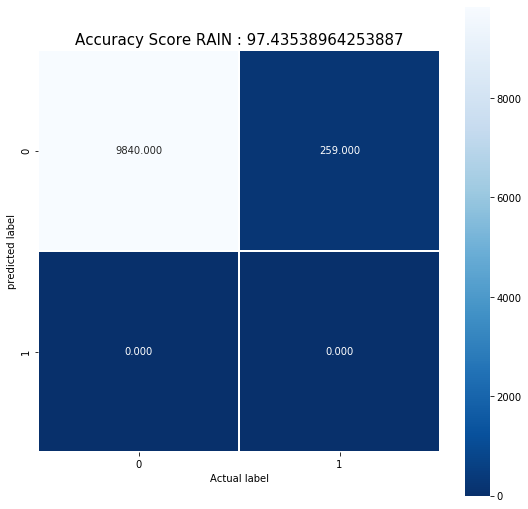

In [329]:
plt.figure(figsize = (9,9))
sns.heatmap(cmatrix, annot = True, fmt = '.3f', linewidths = 1, square = True, cmap = 'Blues_r');
plt.ylabel('predicted label');
plt.xlabel('Actual label');
all_sample_title = 'Accuracy Score RAIN : {0}'.format(score*100)
plt.title(all_sample_title, size = 15);
rain_probability = logic.predict(temp)

In [16]:
logic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
print(logic.coef_)
print(logic.intercept_)
weights = []
bias = []
scores = []
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(score)
while(len(scores) > 1):
    bias.append(len(scores) - 1)
while(len(weights) > 1):
    weights.pop(len(weights) - 1)
while(len(bias) > 1):
    bias.append(len(bias) - 1)


[[-0.00568562]]
[-3.46556651]


c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0


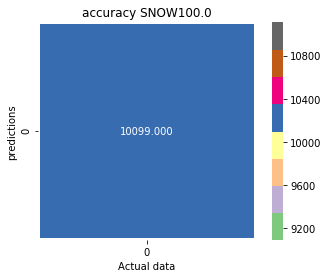

In [330]:
output_data = np.array(data[' _snow'].tolist())
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1/10.0, random_state = 0)
logic.fit(x_train, y_train)
predictions = logic.predict(x_test)
score = logic.score(x_test, y_test)
print(score)

cmatrix = metrics.confusion_matrix(predictions, y_test)

plt.figure()
sns.heatmap(cmatrix, annot = True, fmt = '.3f', linewidths = 2, square = True, cmap = 'Accent');
plt.ylabel('predictions')
plt.xlabel('Actual data')
plt.title("accuracy SNOW{}".format(score*100))
snow_probability = logic.predict(temp)


In [19]:
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(scores)
while(len(scores) > 2):
    bias.append(len(score) - 1)
while(len(weights) > 2):
    weights.pop(len(weights) - 1)
while(len(bias) > 2):
    bias.append(len(bias) - 1)

c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


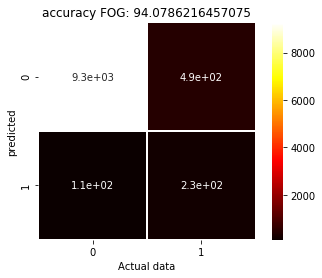

In [331]:
output_data = np.array(data[' _fog'])
x_train, x_test, y_train,  y_test = train_test_split(input_data, output_data, test_size = 1/10.0, random_state = None)

logic.fit(x_train, y_train)
score = logic.score(x_test, y_test)
predictions = logic.predict(x_test)

cmatrix = metrics.confusion_matrix(predictions, y_test)

plt.figure()
sns.heatmap(cmatrix, annot = True, cmap = 'hot', linewidths = 1, square = True)
plt.ylabel('predicted')
plt.xlabel('Actual data')
plt.title('accuracy FOG: {}'.format(score*100))
fog_probability = logic.predict(temp)

In [21]:
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(score)
while(len(scores) > 3):
    bias.append(len(scores) - 1)

In [22]:
print(len(weights), len(bias))
while(len(weights) > 3):
    weights.pop(len(weights) -1)
while(len(bias) > 3):
    bias.pop(len(bias) -1)

3 3


c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


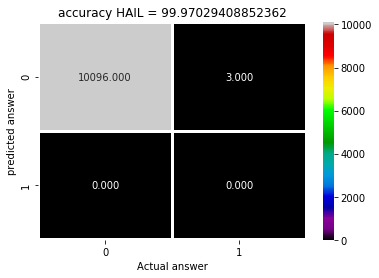

In [332]:
output_data = np.array(data[' _hail'])
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1/10.0)

logic.fit(x_train, y_train)

score = logic.score(x_test, y_test)
predictions = logic.predict(x_test)

cmatrix = metrics.confusion_matrix(predictions, y_test)

plt.figure()
sns.heatmap(cmatrix, square = False, linewidths = 2, cmap = 'nipy_spectral', annot = True, fmt = '.3f')
plt.xlabel('Actual answer')
plt.ylabel('predicted answer')
plt.title('accuracy HAIL = {}'.format(score*100))
hail_probability = logic.predict(temp)

In [24]:
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(score)
while(len(scores) > 4):
    bias.append(len(scores) - 1)
while(len(weights) > 4):
    weights.pop(len(weights) - 1)
while(len(bias) > 4):
    bias.pop(len(bias) - 1)

c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


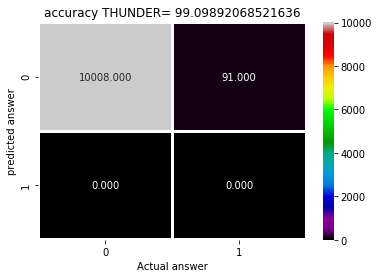

In [333]:
output_data = np.array(data[' _thunder'])
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1/10.0)

logic.fit(x_train, y_train)

score = logic.score(x_test, y_test)
predictions = logic.predict(x_test)

cmatrix = metrics.confusion_matrix(predictions, y_test)

plt.figure()
sns.heatmap(cmatrix, square = False, linewidths = 2, cmap = 'nipy_spectral', annot = True, fmt = '.3f')
plt.xlabel('Actual answer')
plt.ylabel('predicted answer')
plt.title('accuracy THUNDER= {}'.format(score*100))
thunder_probability = logic.predict(temp)

In [26]:
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(score)
while(len(scores) > 5):
    bias.append(len(scores) - 1)
while(len(weights) > 5):
    weights.pop(len(weights) - 1)
while(len(bias) > 5):
    bias.pop(len(bias) - 1)

In [27]:
print(weights)

[[[-0.0056856216580983224]], [[-0.6011366362961678]], [[-0.33717934516342396]], [[-0.13126047468377966]], [[-0.0031312523907338604]]]


In [28]:
#with_temp_hum = {'rain_accuracy':97.61, 'rain_weights':(weights[0], bias[0]), 'snow_accuracy':100, 'snow_weights':(weights[1], bias[1]), 'fog_accuracy':95.28, 'fog_weights':(weights[2], bias[2]), 'hail_accuracy':100, 'hail_weights':(weights[3], bias[3]), 'thunder_accuracy':98.9999, 'thunder_weights':(weights[4], bias[4])} 

In [29]:
#with_temp_hum_dew = {'rain_accuracy':97.4, 'rain_weights':(weights[0], bias[0]), 'snow_accuracy':100, 'snow_weights':(weights[1], bias[1]), 'fog_accuracy':95.35, 'fog_weights':(weights[2], bias[2]), 'hail_accuracy':99.97, 'hail_weights':(weights[3], bias[3]), 'thunder_accuracy':99.108, 'thunder_weights':(weights[4], bias[4])} 

In [30]:
#with_temperature = {'rain_accuracy':scores[0], 'rain_weights':(weights[0], bias[0]), 'snow_accuracy':scores[1], 'snow_weights':(weights[1], bias[1]), 'fog_accuracy':scores[2], 'fog_weights':(weights[2], bias[2]), 'hail_accuracy':scores[3], 'hail_weights':(weights[3], bias[3]), 'thunder_accuracy':scores[4], 'thunder_weights':(weights[4], bias[4])}

In [31]:
#THE PROGRAM HAS BEEN RUN AND THE VALUES ARE STORED IN THE RESPECTIVE DICTIONARY

In [32]:
#with_temperature.get('rain_accuracy')#temperature is the key feature

In [33]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [34]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.2,27.0,NaN,1010.0,0,0,30.0,0,0,5.000000,280.0,West,NaN,NaN,7.40000
1,19961101-12:00,Smoke,10.0,0,0,27.2,32.0,NaN,-9999.0,0,0,28.0,0,0,2.636471,0.0,North,NaN,NaN,5.63287
2,19961101-13:00,Smoke,11.0,0,0,27.2,44.0,NaN,-9999.0,0,0,24.0,0,0,2.636471,0.0,North,NaN,NaN,5.63287
3,19961101-14:00,Smoke,10.0,0,0,27.2,41.0,NaN,1010.0,0,0,24.0,0,0,2.000000,0.0,North,NaN,NaN,5.63287
4,19961101-16:00,Smoke,11.0,0,0,27.2,47.0,NaN,1011.0,0,0,23.0,0,0,1.200000,0.0,North,NaN,NaN,0.00000


In [35]:
time =  []
data_time = []
for i in range(10):
    booleans = []
    for data_ in data[data.columns[0]]:
        booleans.append('0' + str(i) + ':' in data_)
    time.append(booleans)
    data_time.append(data[booleans])
for i in range(10, 24):
    booleans = []
    for data_ in data[data.columns[0]]:
        booleans.append(str(i)+':' in data_)
    time.append(booleans)
    data_time.append(data[booleans])


In [36]:
input_data = np.array(data_time[0][' _tempm']).reshape(1, data_time[0].shape[0])
output_data = np.array(data_time[1][' _tempm']).reshape(data_time[1].shape[0],)
print(input_data.shape)
print(output_data.shape)

(1, 7109)
(2624,)


In [37]:
x_train, x_test, y_train, y_test = train_test_split(input_data ,output_data, test_size = 1/ 10, random_state = None)

ValueError: Found input variables with inconsistent numbers of samples: [1, 2624]

In [38]:
print(input_data[:10])
print(output_data[:10])

[[19. 17. 18. ... 30. 27. 26.]]
[19.         16.         15.         17.         20.01609658 15.
 14.         15.         16.         19.        ]


In [39]:
print(data_time[6].head())
print(data_time[5].head())

       datetime_utc  _conds   _dewptm   _fog   _hail   _heatindexm   _hum  \
18   19961102-06:00   Clear      10.0      0       0          27.2   32.0   
42   19961103-06:00   Smoke      13.0      0       0          27.2   44.0   
65   19961104-06:00   Smoke      12.0      0       0          27.5   37.0   
80   19961105-06:00   Smoke       8.0      0       0          27.2   27.0   
105  19961107-06:00   Smoke      11.0      0       0          27.2   37.0   

      _precipm   _pressurem   _rain   _snow   _tempm   _thunder   _tornado  \
18         NaN       1011.0       0       0     28.0          0          0   
42         NaN       1011.0       0       0     26.0          0          0   
65         NaN       1013.0       0       0     28.0          0          0   
80         NaN       1012.0       0       0     29.0          0          0   
105        NaN       1014.0       0       0     27.0          0          0   

      _vism   _wdird  _wdire   _wgustm   _windchillm   _wspdm  
18  

In [209]:
input_data = data['datetime_utc']
output_data = data[' _tempm']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1 /10, random_state  = None)

In [42]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

ValueError: could not convert string to float: '20050111-15:00'

In [53]:
a = input_data[:10]
b = np.array(list(map(list, (a))))
print(b.T)
c = b.T[9:11]
c = c.T
print(str(c))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [5.         2.63647059 2.63647059 2.         1.2        2.63647059
  0.8        2.63647059 2.63647059 2.63647059]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]
[]


In [54]:
print(c[0])

[]


In [206]:
def sum_(k):
    a = ''
    for i in range(len(k)):
        a += k[i]
    return a

In [56]:
d = list(map(sum_, c))

In [57]:
print(d)

['', '', '', '', '', '', '', '', '', '']


In [210]:
a = input_data
b = np.array(list(map(list, (a))))
c = b.T[9:11]
c = c.T
input_time = list(map(float, list(map(sum_, c))))
print(len(input_time))

100990


In [211]:
print(input_time[:20])

[11.0, 12.0, 13.0, 14.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


In [240]:
c = b.T[6:8]
print(b.T[6:8])
print(c.T)
c = c.T
input_date = list(map(float ,list(map(sum_, c))))

[['0' '0' '0' ... '2' '2' '2']
 ['1' '1' '1' ... '4' '4' '4']]
[['0' '1']
 ['0' '1']
 ['0' '1']
 ...
 ['2' '4']
 ['2' '4']
 ['2' '4']]


In [241]:
output_temp = np.array(data[' _tempm'].tolist())

In [242]:
temp_input = np.array(list(zip(input_date, input_time, output_temp)))
#temp_input = (list(zip(input_time, output_temp)))

In [243]:
temp_input.sort()
temp_input = np.array(temp_input)

In [244]:
temp_input[:100].tolist()

[[1.0, 11.0, 30.0],
 [1.0, 12.0, 28.0],
 [1.0, 13.0, 24.0],
 [1.0, 14.0, 24.0],
 [1.0, 16.0, 23.0],
 [1.0, 17.0, 21.0],
 [1.0, 18.0, 21.0],
 [1.0, 19.0, 21.0],
 [1.0, 19.0, 20.0],
 [1.0, 19.0, 21.0],
 [1.0, 19.0, 22.0],
 [1.0, 19.0, 23.0],
 [0.0, 2.0, 19.0],
 [1.0, 2.0, 19.0],
 [2.0, 2.0, 20.0],
 [2.0, 3.0, 22.0],
 [2.0, 4.0, 23.0],
 [2.0, 5.0, 26.0],
 [2.0, 6.0, 28.0],
 [2.0, 7.0, 30.0],
 [2.0, 8.0, 31.0],
 [2.0, 9.0, 31.0],
 [2.0, 10.0, 31.0],
 [2.0, 11.0, 30.0],
 [2.0, 12.0, 27.0],
 [2.0, 13.0, 25.0],
 [2.0, 14.0, 22.0],
 [2.0, 15.0, 21.0],
 [2.0, 16.0, 19.0],
 [2.0, 17.0, 20.0],
 [2.0, 18.0, 19.0],
 [2.0, 19.0, 19.0],
 [2.0, 17.0, 20.0],
 [2.0, 17.0, 21.0],
 [2.0, 17.0, 22.0],
 [2.0, 17.0, 23.0],
 [0.0, 3.0, 17.0],
 [1.0, 3.0, 16.0],
 [2.0, 3.0, 17.0],
 [3.0, 3.0, 19.0],
 [3.0, 4.0, 22.0],
 [3.0, 5.0, 22.0],
 [3.0, 6.0, 26.0],
 [3.0, 7.0, 28.0],
 [3.0, 8.0, 28.0],
 [3.0, 9.0, 29.0],
 [3.0, 10.0, 29.0],
 [3.0, 11.0, 27.0],
 [3.0, 12.0, 26.0],
 [3.0, 13.0, 22.0],
 [3.0, 14.0, 22.0],


In [239]:
output_temp = temp_input.T[1]
print(output_temp)

[ 1.  3.  3. ... 37. 38. 38.]


In [220]:
index1 = temp_input.T[0].tolist().index(0)
index2 = temp_input.T[0].tolist().index(11)
print(index1)

0


In [60]:
model.fit(temp_input.T[:1].T[index1:index2], output_temp[index1:index2])

NameError: name 'temp_input' is not defined

In [61]:
print(model.coef_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [80]:
score = model.score(temp_input.T[:1].T[index1:index2], output_temp[index1:index2])

NameError: name 'temp_input' is not defined

In [81]:
print(score)

0.9915833250816912


In [82]:
temp_input2 = temp_input = np.array(list(zip(input_time, input_date, output_temp)))


NameError: name 'input_time' is not defined

In [83]:
a = np.array([1, 2, 4, 3])

In [84]:
b = np.array([3, 4, 6, 4])

In [85]:
c = (list(zip(a, b)))


In [86]:
c.sort()

In [87]:
print(c)

[(1, 3), (2, 4), (3, 4), (4, 6)]


In [88]:
c = np.array(c)

In [89]:
print(c)

[[1 3]
 [2 4]
 [3 4]
 [4 6]]


In [90]:
print(score)

0.9915833250816912


In [91]:
#score for linear regression till 12     0.16131
#score for linear regression for whole dat  0.08 

In [92]:
print(score)

0.9915833250816912


In [93]:
print(score)

0.9915833250816912


In [94]:
print(score)# 4  to  12

0.9915833250816912


In [95]:
print(score)# 5 to 11

0.9915833250816912


In [96]:
print(score)#0 to 11

0.9915833250816912


In [97]:
data.head(20)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.2,27.0,NaN,1010.0,0,0,30.0,0,0,5.000000,280.0,West,NaN,NaN,7.40000
1,19961101-12:00,Smoke,10.0,0,0,27.2,32.0,NaN,-9999.0,0,0,28.0,0,0,2.636471,0.0,North,NaN,NaN,5.63287
2,19961101-13:00,Smoke,11.0,0,0,27.2,44.0,NaN,-9999.0,0,0,24.0,0,0,2.636471,0.0,North,NaN,NaN,5.63287
3,19961101-14:00,Smoke,10.0,0,0,27.2,41.0,NaN,1010.0,0,0,24.0,0,0,2.000000,0.0,North,NaN,NaN,5.63287
4,19961101-16:00,Smoke,11.0,0,0,27.2,47.0,NaN,1011.0,0,0,23.0,0,0,1.200000,0.0,North,NaN,NaN,0.00000
5,19961101-17:00,Smoke,12.0,0,0,27.2,56.0,NaN,1011.0,0,0,21.0,0,0,2.636471,0.0,North,NaN,NaN,5.63287
6,19961101-18:00,Smoke,13.0,0,0,27.2,60.0,NaN,1010.0,0,0,21.0,0,0,0.800000,0.0,North,NaN,NaN,0.00000
7,19961101-19:00,Smoke,13.0,0,0,27.2,60.0,NaN,-9999.0,0,0,21.0,0,0,2.636471,0.0,North,NaN,NaN,5.63287
8,19961101-20:00,Smoke,13.0,0,0,27.2,68.0,NaN,-9999.0,0,0,19.0,0,0,2.636471,0.0,North,NaN,NaN,5.63287
9,19961101-21:00,Smoke,13.0,0,0,27.2,68.0,NaN,1010.0,0,0,19.0,0,0,2.636471,0.0,North,NaN,NaN,5.63287


In [98]:
from sklearn.tree import DecisionTreeClassifier

In [335]:
output_data = np.array(data[data.columns[1]].tolist())
input_data = np.array(list(zip(data[' _rain'].tolist(), data[' _thunder'].tolist(), data[' _vism'].tolist(), data[' _fog'].tolist(), data[' _hail'].tolist(), data[' _snow'].tolist())))
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1/10)
model2 = DecisionTreeClassifier()

In [336]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:
predictions = model2.predict(x_test)

Text(159.0, 0.5, 'predicted answer')

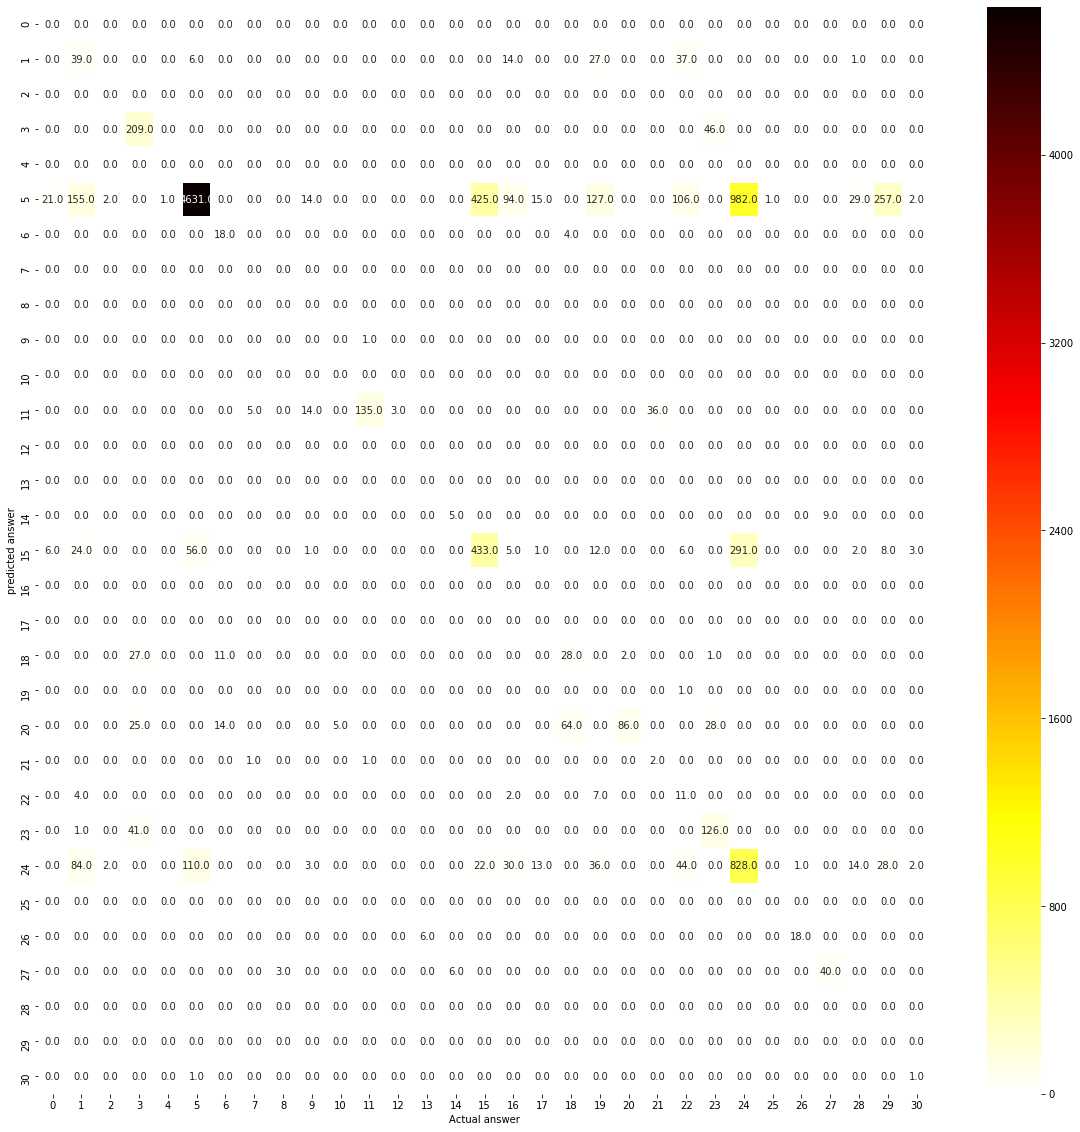

In [102]:
cmatrix = metrics.confusion_matrix(predictions, y_test)

plt.figure(figsize = (20, 20))
sns.heatmap(cmatrix, square = False, linewidths = 0.1, cmap = 'hot_r', annot = True, fmt = '.1f')
plt.xlabel('Actual answer')
plt.ylabel('predicted answer')


In [103]:
model2.predict([[1, 1, 1, 1, 1, 1]])

array(['Patches of Fog'], dtype='<U29')

In [104]:
data.shape
from time import sleep

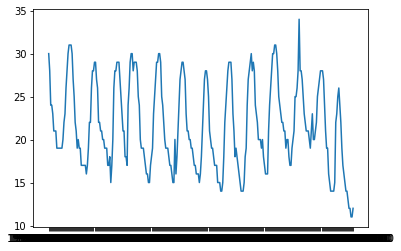

In [107]:
plt.plot(data[data.columns[0]][:300], data[' _tempm'][:300])

In [108]:
import tensorflow as tf
from tensorflow import keras

In [145]:
neuron_model = keras.Sequential()
neuron_model.add(keras.layers.Dense(1, activation = tf.nn.tanh))
keras.optimizers.SGD(lr = 0.001, momentum = 0.1, decay = 0.0, nesterov = True)
neuron_model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
l = data[' _tempm'].shape[0]

In [146]:
neuron_model.fit(np.arange(0, l).reshape(l, 1),  np.array(data[' _tempm'].tolist()).reshape(l, 1), epochs = 10)

TypeError: Unable to build `Dense` layer with non-floating point dtype <dtype: 'int32'>

In [120]:
print(np.array(data[' _tempm'].tolist()))

[30. 28. 24. ... 36. 32. 30.]


In [121]:
np.arange(0, 100).shape

(100,)

In [138]:
input_data_ = np.arange(0, l).reshape(l, 1)
print(input_data_)
print(np.random.randn(10, 1))

[[     0]
 [     1]
 [     2]
 ...
 [100987]
 [100988]
 [100989]]
[[-0.85840589]
 [-0.64552876]
 [-0.65023667]
 [ 0.01644344]
 [-0.7885478 ]
 [ 0.59380525]
 [ 1.07393832]
 [-0.60007836]
 [ 1.31209142]
 [-1.36477353]]


In [143]:
input_data_ = np.random.randn(10000, 1)*10
error = 1
output_data_ = input_data* 2

In [147]:
neuron_model.fit(input_data_, output_data_, epochs = 10)

ValueError: ('Error when checking model target: expected no data, but got:', array([[ 0.        ,  0.        , 10.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  5.27294118,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  5.27294118,  0.        ,  0.        ,
         0.        ],
       ...,
       [ 0.        ,  0.        ,  8.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  4.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  4.        ,  0.        ,  0.        ,
         0.        ]]))

In [230]:
input_data = np.array(list(map(float, np.arange(0, l)))).reshape(l, 1)
output_data = np.array(data[' _tempm'].tolist()).reshape(l, 1)

In [231]:
neuron_model = keras.Sequential()

In [265]:
neuron_model = keras.Sequential()
neuron_model.add(keras.layers.Dense(2, activation = tf.nn.tanh))
neuron_model.add(keras.layers.Dense(3, activation = tf.nn.leaky_relu))
neuron_model.add(keras.layers.Dense(1, activation = tf.nn.leaky_relu))
#neuron_model.add(keras.layers.Dense(10, activation = tf.nn.tanh))
neuron_model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [233]:
neuron_model.fit(input_data, output_data, epochs = 5)

Epoch 1/5
100990/100990 [==============================] - 2s 22us/sample - loss: 75.4764
Epoch 2/5
100990/100990 [==============================] - 2s 20us/sample - loss: 74.3394
Epoch 3/5
100990/100990 [==============================] - 2s 20us/sample - loss: 73.7168
Epoch 4/5
100990/100990 [==============================] - 2s 20us/sample - loss: 73.5453
Epoch 5/5
100990/100990 [==============================] - 2s 20us/sample - loss: 73.2003


In [155]:
print(input_data)

[[     0]
 [     1]
 [     2]
 ...
 [100987]
 [100988]
 [100989]]


In [156]:
print(output_data)

[[30.]
 [28.]
 [24.]
 ...
 [36.]
 [32.]
 [30.]]


In [222]:
neuron_model.fit(temp_input.T[:1].T[index1:index2], output_temp[index1:index2], epochs = 5)

Epoch 1/5
49304/49304 [==============================] - 2s 48us/sample - loss: 70.0606
Epoch 2/5
49304/49304 [==============================] - 3s 52us/sample - loss: 70.0486
Epoch 3/5
49304/49304 [==============================] - 3s 55us/sample - loss: 69.9766
Epoch 4/5
49304/49304 [==============================] - 5s 102us/sample - loss: 69.9379
Epoch 5/5
49304/49304 [==============================] - 5s 104us/sample - loss: 69.9349


In [223]:
predictions = neuron_model.predict(temp_input.T[:1].T[index1:index2])

In [226]:
score = neuron_model.evaluate(temp_input.T[:1].T[index1:index2], output_temp[index1:index2])

49304/49304 [==============================] - 1s 28us/sample - loss: 69.7190


In [229]:
data.head(-1)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.2,27.0,NaN,1010.0,0,0,30.0,0,0,5.000000,280.00,West,NaN,NaN,7.40000
1,19961101-12:00,Smoke,10.0,0,0,27.2,32.0,NaN,-9999.0,0,0,28.0,0,0,2.636471,0.00,North,NaN,NaN,5.63287
2,19961101-13:00,Smoke,11.0,0,0,27.2,44.0,NaN,-9999.0,0,0,24.0,0,0,2.636471,0.00,North,NaN,NaN,5.63287
3,19961101-14:00,Smoke,10.0,0,0,27.2,41.0,NaN,1010.0,0,0,24.0,0,0,2.000000,0.00,North,NaN,NaN,5.63287
4,19961101-16:00,Smoke,11.0,0,0,27.2,47.0,NaN,1011.0,0,0,23.0,0,0,1.200000,0.00,North,NaN,NaN,0.00000
5,19961101-17:00,Smoke,12.0,0,0,27.2,56.0,NaN,1011.0,0,0,21.0,0,0,2.636471,0.00,North,NaN,NaN,5.63287
6,19961101-18:00,Smoke,13.0,0,0,27.2,60.0,NaN,1010.0,0,0,21.0,0,0,0.800000,0.00,North,NaN,NaN,0.00000
7,19961101-19:00,Smoke,13.0,0,0,27.2,60.0,NaN,-9999.0,0,0,21.0,0,0,2.636471,0.00,North,NaN,NaN,5.63287
8,19961101-20:00,Smoke,13.0,0,0,27.2,68.0,NaN,-9999.0,0,0,19.0,0,0,2.636471,0.00,North,NaN,NaN,5.63287
9,19961101-21:00,Smoke,13.0,0,0,27.2,68.0,NaN,1010.0,0,0,19.0,0,0,2.636471,0.00,North,NaN,NaN,5.63287


In [266]:
input_data = temp_input.T[:1].T
output_data = temp_input.T[2]

In [267]:
neuron_model.fit(input_data, output_data, epochs = 5)

Epoch 1/5
100990/100990 [==============================] - 2s 21us/sample - loss: 46.4923
Epoch 2/5
100990/100990 [==============================] - 2s 19us/sample - loss: 43.9039
Epoch 3/5
100990/100990 [==============================] - 2s 19us/sample - loss: 43.0693
Epoch 4/5
100990/100990 [==============================] - 2s 19us/sample - loss: 42.6195
Epoch 5/5
100990/100990 [==============================] - 2s 19us/sample - loss: 42.3249


In [269]:
temp = neuron_model.predict([15])#predicted temperature

In [316]:
neuron_model = keras.Sequential()
neuron_model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid))
neuron_model.add(keras.layers.Dense(2, activation = tf.nn.leaky_relu))
neuron_model.add(keras.layers.Dense(1, activation = tf.nn.leaky_relu))
neuron_model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
#output_temp = np.array(data[' _hum'].tolist())
#temp_input = np.array(list(zip(input_date, input_time, output_temp)))
#temp_input = (list(zip(input_time, output_temp)))
'''temp_input.sort()
temp_input = np.array(temp_input)
input_data = temp_input.T[1:2].T
output_data = temp_input.T[2]'''
output_data = np.array(data[' _hum'].tolist()).reshape(data.shape[0], 1)
input_data = np.array(data[' _tempm'].tolist()).reshape(data.shape[0], 1)
neuron_model.fit(input_data, output_data, epochs = 2)

Epoch 1/2
100990/100990 [==============================] - 3s 25us/sample - loss: 582.0447
Epoch 2/2
100990/100990 [==============================] - 2s 20us/sample - loss: 566.1076


In [311]:
output_temp = np.array(data[' _hum'].tolist())
'''temp_input = np.array(list(zip(input_date, input_time, output_temp)))
#temp_input = (list(zip(input_time, output_temp)))
temp_input.sort()
temp_input = np.array(temp_input)
input_data = temp_input.T[1:2].T
output_data = temp_input.T[2]'''
output_data = np.array(data[' _hum'].tolist())
input_data = np.array(data[' _tempm'].tolist())
neuron_model.fit(input_data, output_data, epochs = 2)

Epoch 1/2
100990/100990 [==============================] - 2s 21us/sample - loss: 568.8591
Epoch 2/2
100990/100990 [==============================] - 2s 21us/sample - loss: 564.8725


In [271]:
print()

[[ 1. 11. 27.]
 [ 1. 12. 32.]
 [ 1. 13. 44.]
 [ 1. 14. 41.]
 [ 1. 16. 47.]
 [ 1. 17. 56.]
 [ 1. 18. 60.]
 [ 1. 19. 60.]
 [ 1. 20. 68.]
 [ 1. 21. 68.]]


In [317]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1 /10, random_state  = None)

In [318]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [319]:
model.score(x_test, y_test)

0.3427529315930089

In [320]:
hum = model.predict(temp)

In [321]:
print(hum, temp)

[[52.28047931]] [[28.776447]]


In [334]:
print(rain_probability, snow_probability, hail_probability, thunder_probability, fog_probability)
#These probabilities have been optained logistic regression defined in the top of this program with temperature as feature

[0] [0] [0] [0] [0]


In [355]:
output_data = np.array(data[data.columns[1]].tolist())
input_data = np.array(list(zip(data[' _rain'].tolist(), data[' _thunder'].tolist(), data[' _fog'].tolist(), data[' _hail'].tolist(), data[' _snow'].tolist())))
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1/10)
model2 = DecisionTreeClassifier()

In [356]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [357]:
print(x_train[0])
print(x_train.shape)
x = np.array([[0],[0],[0],[0],[0]]).T
print(x.shape)
condition = model2.predict(x)
print(condition)
#This have been predicted from decision tree defined above
#[' _rain'][' _thunder'][' _fog'][' _hail'][' _snow']

[0 0 0 0 0]
(90891, 5)
(1, 5)
['Haze']
